In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

stud_math = pd.read_csv('/content/stud_math.xls')
stud_math.info() 
display(stud_math.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


**School** — аббревиатура школы, в которой учится ученик

In [ ]:
display(pd.DataFrame(stud_math.school.value_counts()))

,school
GP,349
MS,46


В колонке school нет значений nan. Большинство учеников из школы GP

**Sex** — пол ученика ('F' - женский, 'M' - мужской)

In [ ]:
display(pd.DataFrame(stud_math.sex.value_counts()))

,sex
F,208
M,187


В колонке sex нет значений nan. Девочек больше чем мальчиков

**Age** — возраст ученика

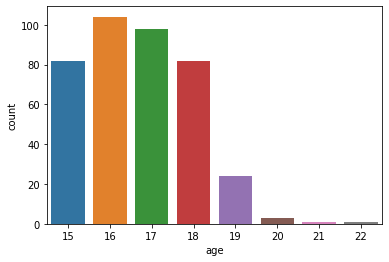

In [ ]:
sns.countplot(x='age',data=stud_math)

В исследовании большинство студентов до 18 лет. Студенты от 19 до 22 лет малочислены. Возможно это означает что многие студенты сдают госэкзамен по математике учась в старшей школе. Остальные возможно "второгодки", студенты по каким-то причинам бросившие школу, но позже вернувшиеся к обучению или студенты, которые пошли в школу позже остальных.

**Address** — тип адреса ученика 

In [ ]:
display(pd.DataFrame(stud_math.address.value_counts()))

,address
U,295
R,83


Пятая часть учеников проживает за городом. 17 студентов видимо решили не делится местом проживания (Nan). Точный адрес студентов неизвестен, поэтому заполнить значения Nan нет возможности
 

**Famsize** — размер семьи

In [ ]:
display(pd.DataFrame(stud_math.famsize.value_counts(dropna=False)))

,famsize
GT3,261
LE3,107
NaN,27


261 семья состоит из более чем трех человек. 107 семей состоят из трех или менее человек, что предпологает следующие варианты: 


1. отец + мать + ребенок
2. родитель одиночка + ребенок
3. родитель одиночка + 2 ребенка
4. ребенок без отца и матери

Заменим nan на LE3, по статистике.

In [ ]:
stud_math.famsize = stud_math.famsize.fillna('LE3')
display(pd.DataFrame(stud_math.famsize.value_counts(dropna=False)))

,famsize
GT3,261
LE3,134


**Pstatus** — статус совместного жилья родителей 

In [ ]:
display(pd.DataFrame(stud_math.Pstatus.value_counts()))

,Pstatus
T,314
A,36


Большинство студентов живут с родителями. 
45 неизвестно, но можно предположить, что студенты с NaN до 18 живут с родителями, а старше - нет.

In [ ]:
stud_math.Pstatus = stud_math.Pstatus.fillna(0)
stud_math.Pstatus.loc[(stud_math.Pstatus == 0) & (stud_math.age <= 18)] = 'T'
stud_math.Pstatus.loc[(stud_math.Pstatus == 0) & (stud_math.age > 18)] = 'A'
display(pd.DataFrame(stud_math.Pstatus.value_counts()))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Pstatus
T,355
A,40


355 живут с родителями, 40 живут раздельно

**Medu** — образование матери 

In [ ]:
display(pd.DataFrame(stud_math.Medu.value_counts(dropna=False)))

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


131 женщин имеют высшее образование, 97 - среднее специальное или 11 классов, 102 - 5-9 классы, 59 - 4 класса, у троих нет образования и 3 неизвестно.

**Fedu** — образование отца

In [ ]:
display(pd.DataFrame(stud_math.Fedu.value_counts(dropna=False)))

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


88 мужчин имеют высшее образование, 96 - среднее специальное или 11 классов, 106 - 5-9 классы, 78 - 4 класса, у твоих нет образования и 24 неизвестно. Скорее всего 40 это опечатка и стоит заменить ее на 4.

In [ ]:
stud_math.Fedu.loc[stud_math.Fedu == 40] = 4
display(pd.DataFrame(stud_math.Fedu.value_counts(dropna=False)))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
NaN,24
0.0,2


Большое количество неизвестно предположим что уровень образования и женщин и мужчин в процентном соотношении похожий, значит заменим NaN на 4.0.

In [ ]:
stud_math.Fedu = stud_math.Fedu.fillna(4)
display(pd.DataFrame(stud_math.Fedu.value_counts(dropna=False)))

,Fedu
4.0,113
2.0,106
3.0,96
1.0,78
0.0,2


**Mjob** — работа матери

In [ ]:
display(pd.DataFrame(stud_math.Mjob.value_counts(dropna=False)))

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


98 матерей работают на гос. службе, 58 - не работают, 55 - учителя, 32 - работают в сфере здравоохранения, 133 - другие профессии, 19 - неизвестно

**Fjob** — работа отца 

In [ ]:
display(pd.DataFrame(stud_math.Fjob.value_counts(dropna=False)))

,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


102 отца работают на гос. службе, 16 - не работают, 29 - учителя, 15 - работают в сфере здравоохранения, 197 - другие профессии, 36 - неизвестно

Воспользуемся стастикой России, что 50% женщин и 40% мужчин не работают, поэтому заменим nan на at_home

In [ ]:
stud_math.Mjob = stud_math.Mjob.fillna('at_home')
display(pd.DataFrame(stud_math.Mjob.value_counts(dropna=False)))

,Mjob
other,133
services,98
at_home,77
teacher,55
health,32


In [ ]:
stud_math.Fjob = stud_math.Fjob.fillna('at_home')
display(pd.DataFrame(stud_math.Fjob.value_counts(dropna=False)))

,Fjob
other,197
services,102
at_home,52
teacher,29
health,15


**reason** — причина выбора школы 

In [ ]:
display(pd.DataFrame(stud_math.reason.value_counts(dropna=False)))

,reason
course,137
home,104
reputation,103
other,34
NaN,17


137 выбрали школу из-за образовательной программы, 104 - близость к дому, 103 - репутация школы, 34 - другие. Я думаю у каждого свои причины для выбора и поэтому nan можно заменить на other

In [ ]:
stud_math.reason = stud_math.reason.fillna('other')
display(pd.DataFrame(stud_math.reason.value_counts(dropna=False)))

,reason
course,137
home,104
reputation,103
other,51


**guardian** — опекун

In [ ]:
display(pd.DataFrame(stud_math.guardian.value_counts(dropna=False)))

,guardian
mother,250
father,86
NaN,31
other,28


250 опекунов - матери, 86 - отцы, 28 - другие. Обобщим и заменим nan на mother

In [ ]:
stud_math.guardian = stud_math.guardian.fillna('mother')
display(pd.DataFrame(stud_math.guardian.value_counts(dropna=False)))

,guardian
mother,281
father,86
other,28


**traveltime** — время в пути до школы

In [ ]:
display(pd.DataFrame(stud_math.traveltime.value_counts(dropna=False)))

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


242 ребёнка добираются до школы менее 15 мин, 96 - от 15 до 30 мин, 22 - от 30 до 60, 7 - более 60 мин, 28 - неизвестно

Предположим что дети которые живут за городом добираются дольше 60 мин, а остальные от полчаса до часа

In [ ]:
stud_math.traveltime = stud_math.traveltime.fillna(0)
stud_math.traveltime.loc [(stud_math.traveltime == 0) & (stud_math.address == 'R')] = 4
stud_math.traveltime.loc [(stud_math.traveltime == 0) & (stud_math.address != 'R')] = 3
display(pd.DataFrame(stud_math.traveltime.value_counts(dropna=False)))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,traveltime
1.0,242
2.0,96
3.0,43
4.0,14


**studytime** — время на учёбу помимо школы в неделю 

In [ ]:
display(pd.DataFrame(stud_math.studytime.value_counts(dropna=False)))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


194 ученика занимаются от 2 до 5 часов помимо школы, 103 - менее 2 часов, 64 - от 5 до 10 часов, 27 - более 10 часов. Предоположу что 7 неизвестных занимаюся от 5 до 10 часов

In [ ]:
stud_math.studytime = stud_math.studytime.fillna(3)
display(pd.DataFrame(stud_math.studytime.value_counts(dropna=False)))

,studytime
2.0,194
1.0,103
3.0,71
4.0,27


**failures** — количество внеучебных неудач 

In [ ]:
display(pd.DataFrame(stud_math.failures.value_counts(dropna=False)))

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


У 293 нет внеучебных неудач или их больше трёх, 49 - 1 неудача, 16 - 2 неудачи, 15 - 3 неудачи. Предположим что те кто занимается меньше вне школы совершает 3 неудачи, а остальное 0

In [ ]:
stud_math.failures = stud_math.failures.fillna(10)
stud_math.failures.loc [(stud_math.studytime == 1) & (stud_math.failures == 10)] = 3
stud_math.failures.loc [(stud_math.studytime != 1) & (stud_math.failures == 10)] = 0
display(pd.DataFrame(stud_math.failures.value_counts(dropna=False)))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,failures
0.0,307
1.0,49
3.0,23
2.0,16


**schoolsup**  — дополнительная образовательная поддержка 

In [ ]:
display(pd.DataFrame(stud_math.schoolsup.value_counts(dropna=False)))

,schoolsup
no,335
yes,51
NaN,9


Обычно в школах нет доп занятий, если только не олимпиады. Заменим на no

In [ ]:
stud_math.schoolsup = stud_math.schoolsup.fillna('no')
display(pd.DataFrame(stud_math.schoolsup.value_counts(dropna=False)))

,schoolsup
no,344
yes,51


**famsup**  — семейная образовательная поддержка

In [ ]:
display(pd.DataFrame(stud_math.famsup.value_counts(dropna=False)))

,famsup
yes,219
no,137
NaN,39


Я думаю что родители меньше помогают с уроками и математикой после 15 лет (кроме денег на репетиторов и может быть отвезти туда), поэтому заменяем nan на no

In [ ]:
stud_math.famsup = stud_math.famsup.fillna('no')
display(pd.DataFrame(stud_math.famsup.value_counts(dropna=False)))

,famsup
yes,219
no,176


**paid** — дополнительные платные занятия по математике

In [ ]:
display(pd.DataFrame(stud_math.paid.value_counts(dropna=False)))

,paid
no,200
yes,155
NaN,40


Обычно ученики занимаются у репетиторов или онлайн школах. Заменим на yes

In [ ]:
stud_math.paid = stud_math.paid.fillna('yes')
display(pd.DataFrame(stud_math.paid.value_counts(dropna=False)))

,paid
no,200
yes,195


**activities** — дополнительные внеучебные занятия

In [ ]:
display(pd.DataFrame(stud_math.activities.value_counts(dropna=False)))

,activities
yes,195
no,186
NaN,14


Обычно у учеников хобби: спорт, рисование, музыкальные инструменты. Заменим на yes

In [ ]:
stud_math.activities = stud_math.activities.fillna('yes')
display(pd.DataFrame(stud_math.activities.value_counts(dropna=False)))

,activities
yes,209
no,186


**nursery** — посещал детский сад

In [ ]:
display(pd.DataFrame(stud_math.nursery.value_counts(dropna=False)))

,nursery
yes,300
no,79
NaN,16


Большинство детей ходят в сады: частные и госудаственные. Заменим на yes

In [ ]:
stud_math.nursery = stud_math.nursery.fillna('yes')
display(pd.DataFrame(stud_math.nursery.value_counts(dropna=False)))

,nursery
yes,316
no,79


**higher** — хочет получить высшее образование

In [ ]:
display(pd.DataFrame(stud_math.higher.value_counts(dropna=False)))

,higher
yes,356
NaN,20
no,19


Предположим, что десятая часть учеников не хочет получать высшее образование.

In [ ]:
stud_math.higher = stud_math.higher.fillna('no')
display(pd.DataFrame(stud_math.higher.value_counts(dropna=False)))

,higher
yes,356
no,39


**internet** — наличие интернета дома

In [ ]:
display(pd.DataFrame(stud_math.internet.value_counts(dropna=False)))

,internet
yes,305
no,56
NaN,34


Предположим что люди без интернета малочислены, т.к. участвуют две школы на вряд ли они из тех стран в которых нет интернета 

In [ ]:
stud_math.internet = stud_math.internet.fillna('yes')
display(pd.DataFrame(stud_math.internet.value_counts(dropna=False)))

,internet
yes,339
no,56


**romantic** — в романтических отношениях

In [ ]:
display(pd.DataFrame(stud_math.romantic.value_counts(dropna=False)))

,romantic
no,240
yes,124
NaN,31


Для nan предположим, что ученики nan старше 18 имеют отношения, а остальные нет

In [ ]:
stud_math.romantic = stud_math.romantic.fillna(1)
stud_math.romantic.loc [(stud_math.romantic == 1) & (stud_math.age >= 18)] = 'yes'
stud_math.romantic.loc [(stud_math.romantic == 1) & (stud_math.age < 18)] = 'no'
display(pd.DataFrame(stud_math.romantic.value_counts(dropna=False)))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,romantic
no,264
yes,131


**famrel** — семейные отношения

In [ ]:
display(pd.DataFrame(stud_math.famrel.value_counts(dropna=False)))

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


Думаю -1 опечатка, заменим на 1. Давайте предположим что у nan отношения очень хорошие

In [ ]:
stud_math.famrel = stud_math.famrel.fillna(5)
stud_math.famrel.loc [stud_math.famrel == -1] = 1
display(pd.DataFrame(stud_math.famrel.value_counts(dropna=False)))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,famrel
4.0,182
5.0,126
3.0,62
2.0,17
1.0,8


**freetime** — свободное время после школы 

In [ ]:
display(pd.DataFrame(stud_math.freetime.value_counts(dropna=False)))

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


Поскольку это довольно субъективное исчисление, предположим что nan это 3, среднее количество свободного времени у них есть

In [ ]:
stud_math.freetime = stud_math.freetime.fillna(3)
display(pd.DataFrame(stud_math.freetime.value_counts(dropna=False)))

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


**goout** — проведение времени с друзьями

In [ ]:
display(pd.DataFrame(stud_math.goout.value_counts(dropna=False)))

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


Поскольку это довольно субъективное исчисление, предположим что nan это 3 и что поводят с друзьями среднее количество времени

In [ ]:
stud_math.goout = stud_math.goout.fillna(3)
display(pd.DataFrame(stud_math.goout.value_counts(dropna=False)))

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


**health** — текущее состояние здоровья

In [ ]:
display(pd.DataFrame(stud_math.health.value_counts(dropna=False)))

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


Думаю можно предположить что у nan учеников довольно хорошее здоровье, но не отличное

In [ ]:
stud_math.health = stud_math.health.fillna(4)
display(pd.DataFrame(stud_math.health.value_counts(dropna=False)))

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


**absences** — количество пропущенных занятий

In [ ]:
display(pd.DataFrame(stud_math.absences.value_counts(dropna=False)))

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


При беглом просмотре наблюдаются выбросы, проверим это на гистограмме. А nan заменим на моду т.е 0

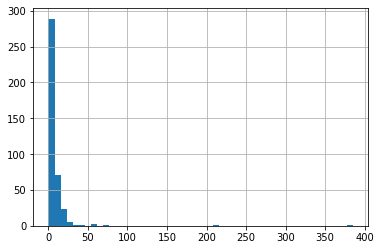

In [ ]:
 stud_math.absences = stud_math.absences.fillna(0)
 stud_math.absences.hist(bins = 50)

Вычислим квартили

In [ ]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
display(IQR)
display(perc25)
display(perc75)
display(perc75+1,5*IQR)

8.0

0.0

8.0

9.0

40.0

Выбросами считаются ученики с более 40 пропусками. К сожалению, не обозначен временной интервал прогулов. Предположим так оно и есть и удалим остальные

In [ ]:
stud_math = stud_math[stud_math['absences']<40]
stud_math.info

<bound method DataFrame.info of     school sex  age address famsize  ... freetime  goout  health absences score
0       GP   F   18       U     LE3  ...      3.0    4.0     3.0      6.0  30.0
1       GP   F   17       U     GT3  ...      3.0    3.0     3.0      4.0  30.0
2       GP   F   15       U     LE3  ...      3.0    2.0     3.0     10.0  50.0
3       GP   F   15       U     GT3  ...      2.0    2.0     5.0      2.0  75.0
4       GP   F   16       U     GT3  ...      3.0    2.0     5.0      4.0  50.0
..     ...  ..  ...     ...     ...  ...      ...    ...     ...      ...   ...
389     MS   F   18       U     GT3  ...      1.0    1.0     5.0      0.0   0.0
391     MS   M   17       U     LE3  ...      4.0    5.0     2.0      3.0  80.0
392     MS   M   21       R     GT3  ...      5.0    3.0     3.0      3.0  35.0
393     MS   M   18       R     LE3  ...      4.0    1.0     5.0      0.0  50.0
394     MS   M   19       U     LE3  ...      2.0    3.0     5.0      5.0  45.0

[389 ro

**score** — баллы по госэкзамену по математике

In [ ]:
display(pd.DataFrame(stud_math.score.value_counts(dropna=False)))

,score
50.0,54
55.0,44
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,25
80.0,16


Удалим строки с nan. Все значения от 0 до 100, что соответствует градации, думаю в данном случае удалять выбросы некорректно

In [ ]:
stud_math.score = stud_math.score.fillna(120)
stud_math = stud_math[stud_math['score']!=120]
stud_math.info

<bound method DataFrame.info of     school sex  age address famsize  ... freetime  goout  health absences score
0       GP   F   18       U     LE3  ...      3.0    4.0     3.0      6.0  30.0
1       GP   F   17       U     GT3  ...      3.0    3.0     3.0      4.0  30.0
2       GP   F   15       U     LE3  ...      3.0    2.0     3.0     10.0  50.0
3       GP   F   15       U     GT3  ...      2.0    2.0     5.0      2.0  75.0
4       GP   F   16       U     GT3  ...      3.0    2.0     5.0      4.0  50.0
..     ...  ..  ...     ...     ...  ...      ...    ...     ...      ...   ...
389     MS   F   18       U     GT3  ...      1.0    1.0     5.0      0.0   0.0
391     MS   M   17       U     LE3  ...      4.0    5.0     2.0      3.0  80.0
392     MS   M   21       R     GT3  ...      5.0    3.0     3.0      3.0  35.0
393     MS   M   18       R     LE3  ...      4.0    1.0     5.0      0.0  50.0
394     MS   M   19       U     LE3  ...      2.0    3.0     5.0      5.0  45.0

[383 ro

Удалим те строки в которых мы не смогли заменить nan

In [ ]:
stud_math = stud_math.dropna()
stud_math.info

<bound method DataFrame.info of     school sex  age address famsize  ... freetime  goout  health absences score
0       GP   F   18       U     LE3  ...      3.0    4.0     3.0      6.0  30.0
1       GP   F   17       U     GT3  ...      3.0    3.0     3.0      4.0  30.0
2       GP   F   15       U     LE3  ...      3.0    2.0     3.0     10.0  50.0
3       GP   F   15       U     GT3  ...      2.0    2.0     5.0      2.0  75.0
4       GP   F   16       U     GT3  ...      3.0    2.0     5.0      4.0  50.0
..     ...  ..  ...     ...     ...  ...      ...    ...     ...      ...   ...
389     MS   F   18       U     GT3  ...      1.0    1.0     5.0      0.0   0.0
391     MS   M   17       U     LE3  ...      4.0    5.0     2.0      3.0  80.0
392     MS   M   21       R     GT3  ...      5.0    3.0     3.0      3.0  35.0
393     MS   M   18       R     LE3  ...      4.0    1.0     5.0      0.0  50.0
394     MS   M   19       U     LE3  ...      2.0    3.0     5.0      5.0  45.0

[359 ro

Осталось 359 значения.

**Корреляционный анализ**

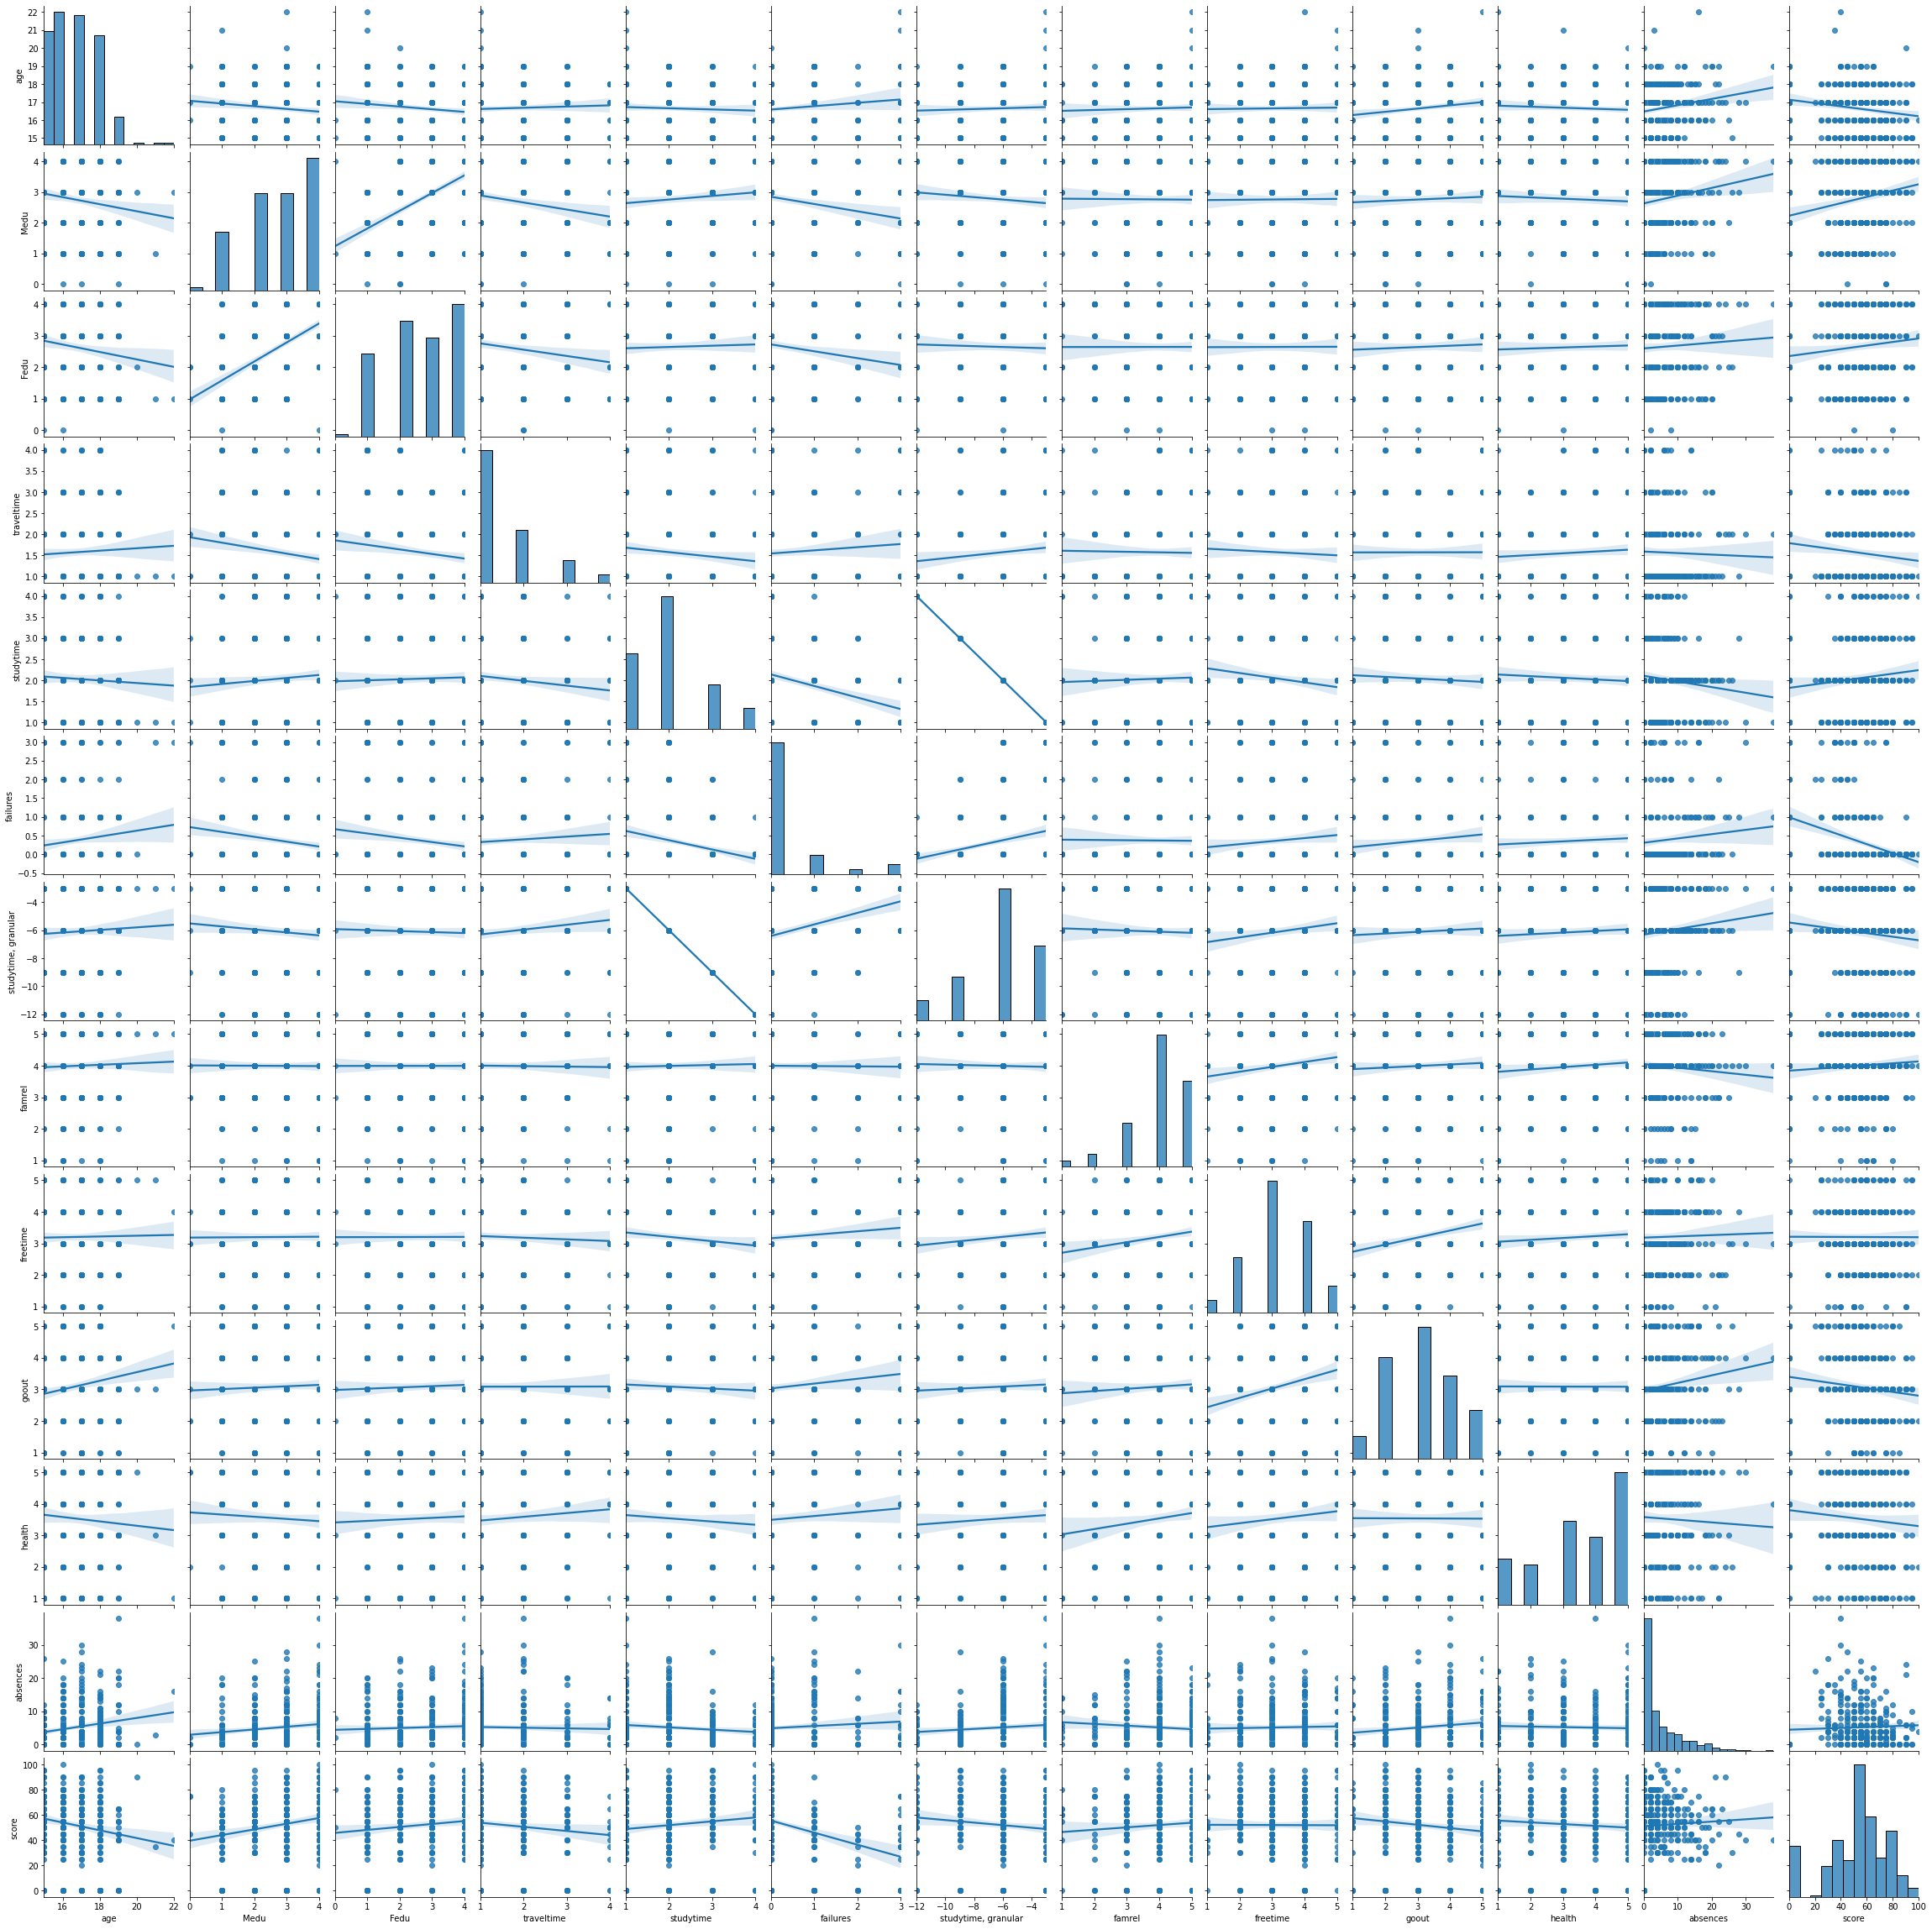

In [ ]:
sns.pairplot(stud_math, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [ ]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.131604,-0.132000,0.044066,-0.045205,0.121002,0.045205,0.034575,0.015937,0.156929,-0.062734,0.172608,-0.168027
Medu,-0.131604,1.000000,0.590841,-0.173324,0.091629,-0.175847,-0.091629,-0.006826,0.008074,0.044603,-0.055191,0.142600,0.215148
Fedu,-0.132000,0.590841,1.000000,-0.147157,0.030934,-0.158504,-0.030934,0.000746,0.002784,0.041187,0.039063,0.049907,0.114632
traveltime,0.044066,-0.173324,-0.147157,1.000000,-0.111263,0.074116,0.111263,-0.014173,-0.045485,0.001179,0.071009,-0.027194,-0.117872
studytime,-0.045205,0.091629,0.030934,-0.111263,1.000000,-0.261358,-1.000000,0.028561,-0.124361,-0.050632,-0.063024,-0.097476,0.113394
failures,0.121002,-0.175847,-0.158504,0.074116,-0.261358,1.000000,0.261358,-0.008421,0.094714,0.113756,0.071265,0.087463,-0.338839
"studytime, granular",0.045205,-0.091629,-0.030934,0.111263,-1.000000,0.261358,1.000000,-0.028561,0.124361,0.050632,0.063024,0.097476,-0.113394
famrel,0.034575,-0.006826,0.000746,-0.014173,0.028561,-0.008421,-0.028561,1.000000,0.160250,0.058597,0.111628,-0.077261,0.073675
freetime,0.015937,0.008074,0.002784,-0.045485,-0.124361,0.094714,0.124361,0.160250,1.000000,0.257187,0.086653,0.025863,-0.003593
goout,0.156929,0.044603,0.041187,0.001179,-0.050632,0.113756,0.050632,0.058597,0.257187,1.000000,-0.003043,0.135899,-0.125564


Скоррелированные с итогами теста переменные: Medu, Fedu, studytime, famrel, absences

**Анализ номинативных переменных**

In [ ]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=10)
    ax.set_title('Boxplot for ' + column)
    plt.show()

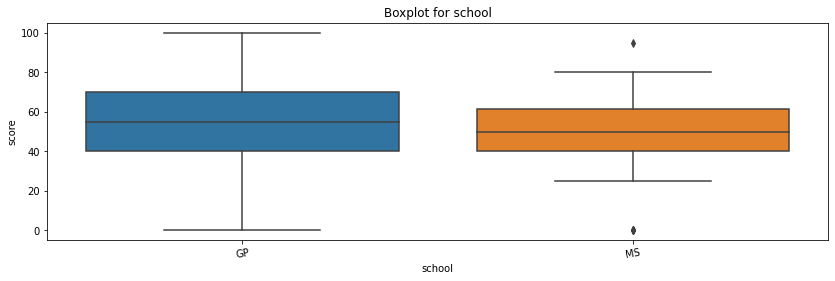

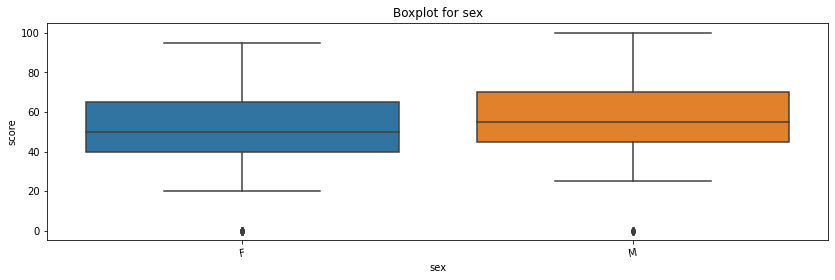

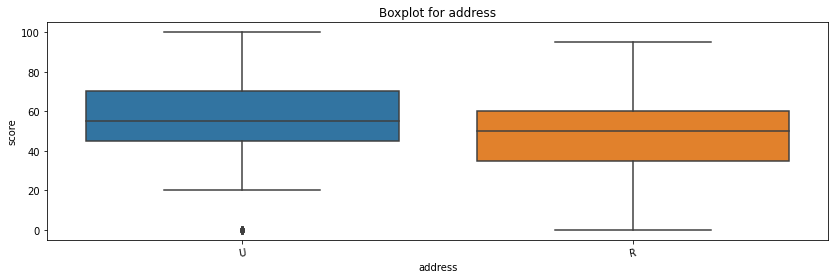

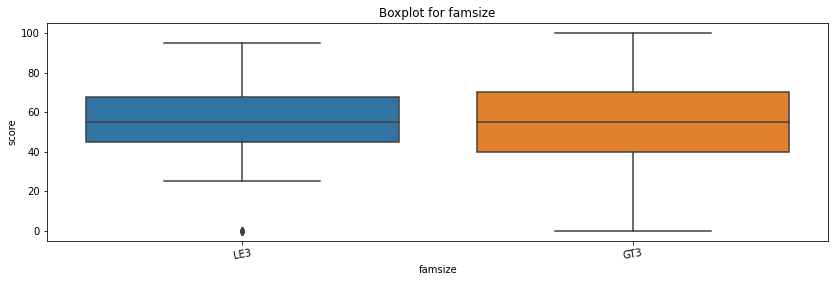

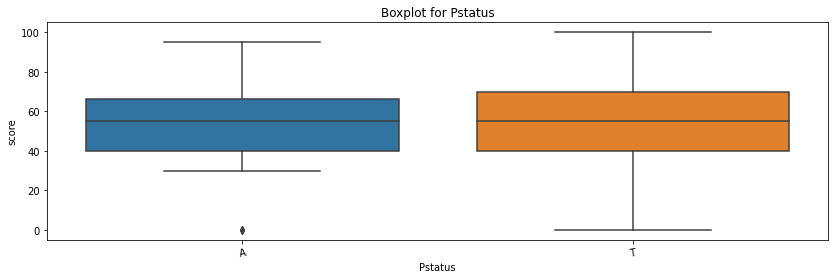

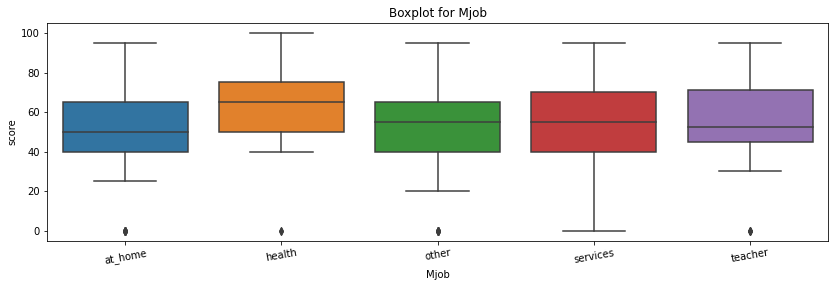

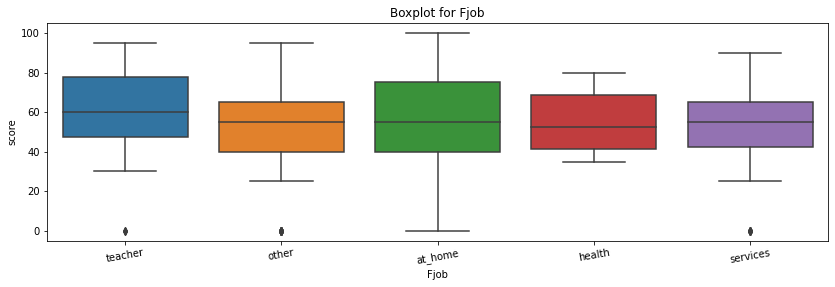

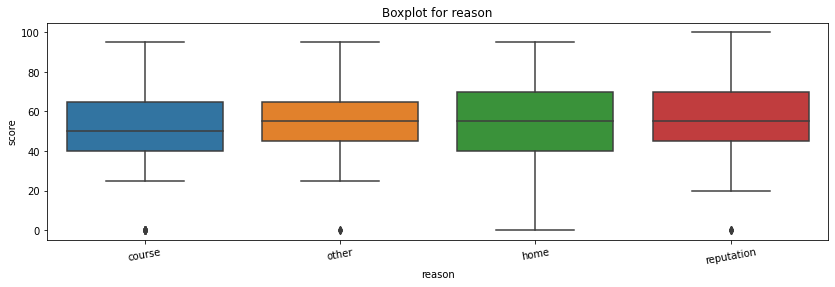

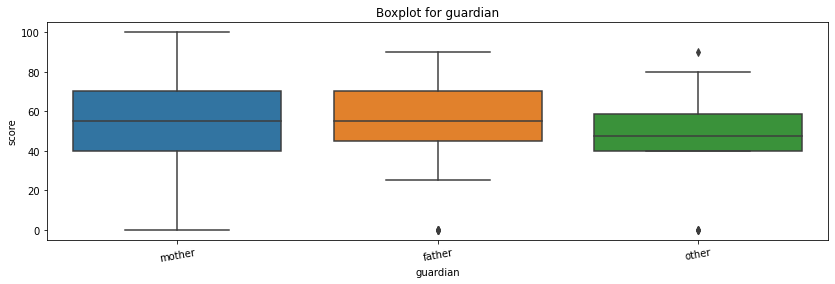

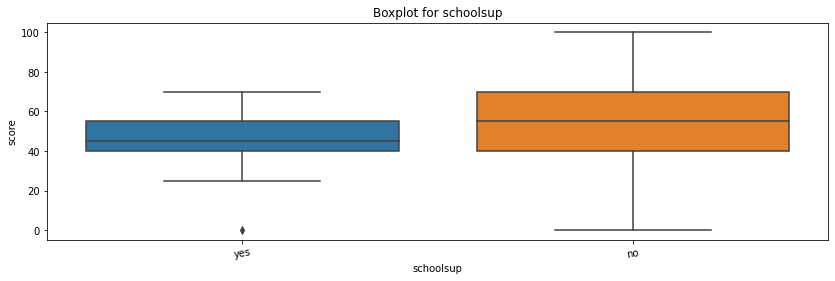

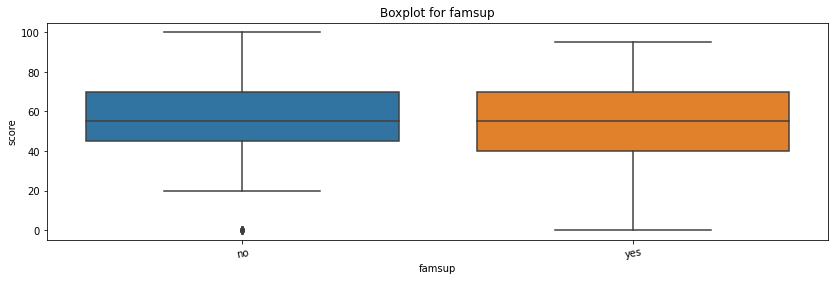

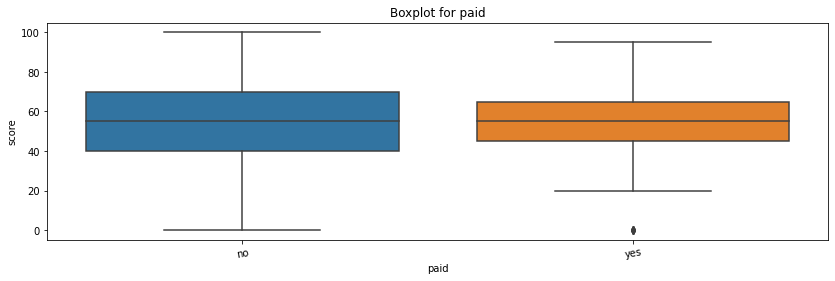

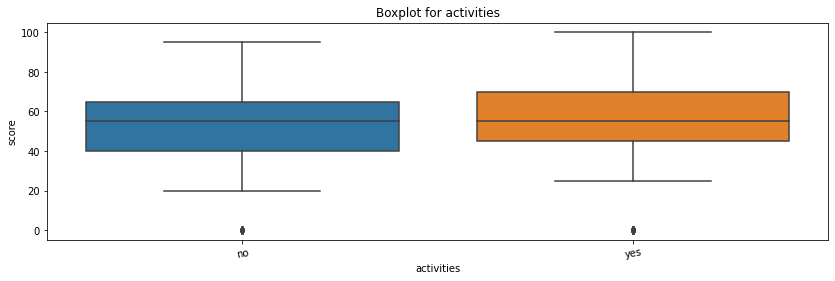

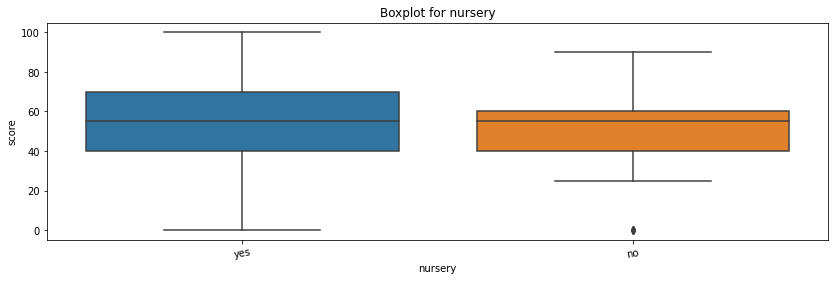

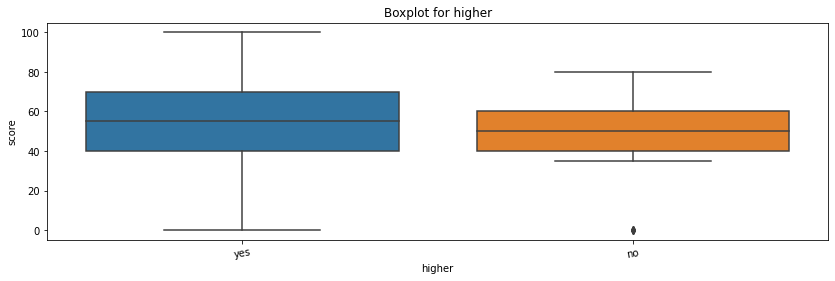

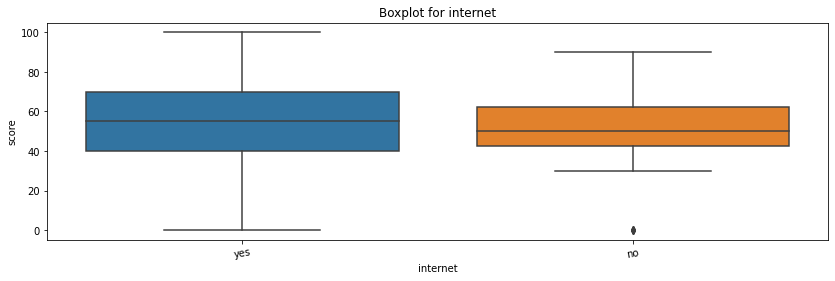

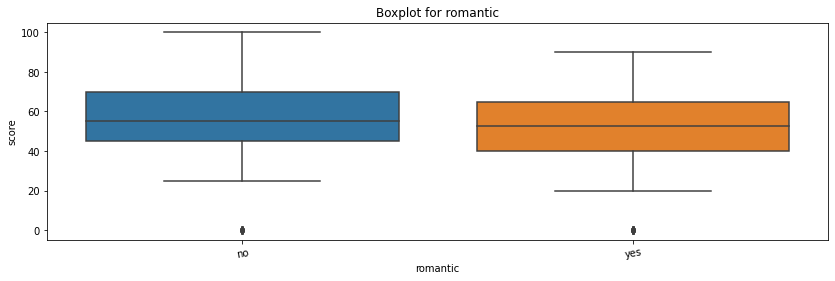

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
  get_boxplot(col)

Воспользуемся тестом Стьюдента для распознования значимости

In [ ]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются три параметра: sex,  address, schoolsup и  romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: Medu, Fedu, studytime, famrel, absences, sex,  address, schoolsup и  romantic

In [ ]:
stud_math_model = stud_math.loc[:, ['Medu', 'Fedu', 'studytime', 'famrel', 'absences', 'sex', 'address', 'schoolsup', 'romantic']]
stud_math_model.head()

,Medu,Fedu,studytime,famrel,absences,sex,address,schoolsup,romantic
0,4.0,4.0,2.0,4.0,6.0,F,U,yes,no
1,1.0,1.0,2.0,5.0,4.0,F,U,no,no
2,1.0,1.0,2.0,4.0,10.0,F,U,yes,no
3,4.0,2.0,3.0,3.0,2.0,F,U,no,yes
4,3.0,3.0,2.0,4.0,4.0,F,U,no,no


Итак, в результате EDA для анализа влияния условий жизни учащихся на успеваемость по математике были получены следующие выводы:

В данных достаточно много пустых значений, если удалить все строки с nan с самого начала получится строк 50 примерно.

Выбросы найдены только в столбцах с количеством прогулов.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Medu, Fedu, studytime, famrel, absences, sex, address, schoolsup и romantic.